In [488]:
from sklearn.naive_bayes import GaussianNB
from sklearn.cross_validation import train_test_split
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import xgboost as xgb
from sklearn.grid_search import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn import svm, datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from scipy import sparse

In [2]:
data = pd.read_csv('final.csv')

In [528]:
data['Nama_Matkul'] = data['Nama_Matkul'].str.strip()

In [529]:
data

,Nama_Matkul,nilai_pras1,nilai_pras2,nilai_pras3,nilai_pras4,y,mean_pras,median_pras,std_pras,num_pras
0,Pengantar Organisasi Komputer,3.3,4.0,NaN,NaN,lulus,3.65,3.65,0.494975,2
1,Basis Data,4.0,NaN,NaN,NaN,lulus,4.00,4.00,0.000000,1
2,Pengantar Organisasi Komputer,2.7,3.3,NaN,NaN,lulus,3.00,3.00,0.424264,2
3,Pengantar Organisasi Komputer,2.7,4.0,NaN,NaN,hati hati,3.35,3.35,0.919239,2
4,Pengantar Organisasi Komputer,3.7,2.7,NaN,NaN,lulus,3.20,3.20,0.707107,2
5,Pengantar Organisasi Komputer,2.0,2.7,NaN,NaN,lulus,2.35,2.35,0.494975,2
6,Pengantar Organisasi Komputer,2.0,3.3,NaN,NaN,hati hati,2.65,2.65,0.919239,2
7,Jaringan Komputer,4.0,NaN,NaN,NaN,lulus,4.00,4.00,0.000000,1
8,Jaringan Komputer,3.3,NaN,NaN,NaN,lulus,3.30,3.30,0.000000,1
9,Pengantar Organisasi Komputer,3.0,3.3,NaN,NaN,hati hati,3.15,3.15,0.212132,2


In [530]:
used = data.loc[:,['Nama_Matkul', 'mean_pras', 'median_pras', 'std_pras', 'num_pras', 'y']]

In [531]:
used.groupby('y').count()

,Nama_Matkul,mean_pras,median_pras,std_pras,num_pras
y,,,,,
hati hati,12686,12686,12686,12686,12686
lulus,18027,18027,18027,18027,18027
tidak lulus,607,607,607,607,607


In [532]:
used = used.dropna()

In [533]:
used

,Nama_Matkul,mean_pras,median_pras,std_pras,num_pras,y
0,Pengantar Organisasi Komputer,3.65,3.65,0.494975,2,lulus
1,Basis Data,4.00,4.00,0.000000,1,lulus
2,Pengantar Organisasi Komputer,3.00,3.00,0.424264,2,lulus
3,Pengantar Organisasi Komputer,3.35,3.35,0.919239,2,hati hati
4,Pengantar Organisasi Komputer,3.20,3.20,0.707107,2,lulus
5,Pengantar Organisasi Komputer,2.35,2.35,0.494975,2,lulus
6,Pengantar Organisasi Komputer,2.65,2.65,0.919239,2,hati hati
7,Jaringan Komputer,4.00,4.00,0.000000,1,lulus
8,Jaringan Komputer,3.30,3.30,0.000000,1,lulus
9,Pengantar Organisasi Komputer,3.15,3.15,0.212132,2,hati hati


# Encoding

In [534]:
used = pd.get_dummies(used, columns=['Nama_Matkul'])

In [539]:
used.columns

Index(['mean_pras', 'median_pras', 'std_pras', 'num_pras', 'y',
       'Nama_Matkul_Administrasi Sistem', 'Nama_Matkul_Analisis Numerik',
       'Nama_Matkul_Aproksimasi & Sistem Nonlinier', 'Nama_Matkul_Basis Data',
       'Nama_Matkul_Basis Data Lanjut', 'Nama_Matkul_Bioinformatika',
       'Nama_Matkul_Customer Relationship Management',
       'Nama_Matkul_Dasar-Dasar Arsitektur Komputer',
       'Nama_Matkul_Dasar-Dasar Audit SI',
       'Nama_Matkul_Desain & Analisis Algoritma', 'Nama_Matkul_E-Commerce',
       'Nama_Matkul_Enterprise Resource Planning',
       'Nama_Matkul_Game Development', 'Nama_Matkul_Geometri Komputasional',
       'Nama_Matkul_Grafika Komputer', 'Nama_Matkul_Infrastruktur TI Modern',
       'Nama_Matkul_Jaringan Komputer', 'Nama_Matkul_Jaringan Komunikasi Data',
       'Nama_Matkul_Jejaring Semantik', 'Nama_Matkul_Kecerdasan Bisnis',
       'Nama_Matkul_Komputasi Lunak',
       'Nama_Matkul_Komputasi Ubiquitous & Net-Sentris',
       'Nama_Matkul_Konfigurasi

In [535]:
one_hot_df = used.loc[:,'Nama_Matkul_Administrasi Sistem':].stack().to_dense()

In [536]:
one_hot_df[0]

Nama_Matkul_Administrasi Sistem                        0
Nama_Matkul_Analisis Numerik                           0
Nama_Matkul_Aproksimasi & Sistem Nonlinier             0
Nama_Matkul_Basis Data                                 0
Nama_Matkul_Basis Data Lanjut                          0
Nama_Matkul_Bioinformatika                             0
Nama_Matkul_Customer Relationship Management           0
Nama_Matkul_Dasar-Dasar Arsitektur Komputer            0
Nama_Matkul_Dasar-Dasar Audit SI                       0
Nama_Matkul_Desain & Analisis Algoritma                0
Nama_Matkul_E-Commerce                                 0
Nama_Matkul_Enterprise Resource Planning               0
Nama_Matkul_Game Development                           0
Nama_Matkul_Geometri Komputasional                     0
Nama_Matkul_Grafika Komputer                           0
Nama_Matkul_Infrastruktur TI Modern                    0
Nama_Matkul_Jaringan Komputer                          0
Nama_Matkul_Jaringan Komunikasi

# Visualisasi

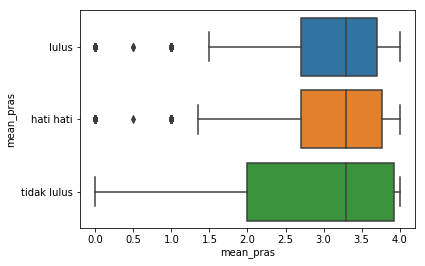

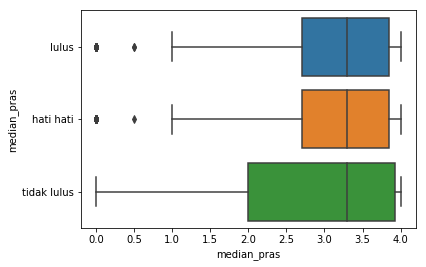

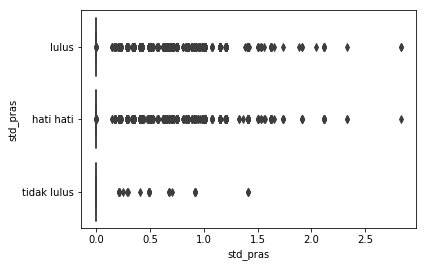

In [537]:
cols = ['mean_pras', 'median_pras', 'std_pras', 'num_pras']

for index in range(len(cols) - 1):
    sns.boxplot(x= cols[index], y='y', data=used)
    plt.ylabel(cols[index])
    plt.show()

# Dengan NPM

In [189]:
used['Nama_Matkul'] = pd.Categorical(used['Nama_Matkul']).codes

# Dengan Normalisasi

In [78]:
col = ['mean_pras', 'median_pras', 'std_pras', 'num_pras']
col_zscore = col
used[col_zscore] = (used[col] - used[col].mean())/used[col].std(ddof=0)

# Tanpa Oversampling

In [132]:
col = used.columns
col = col.drop(['y'])
target = used['y']
features = used.loc[:, col]
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.3, random_state=10)

# Dengan SMOTE

In [76]:
from imblearn.over_sampling import SMOTE 

In [150]:
col = used.columns
col = col.drop(['y'])
target = used['y']
features = used.loc[:, col]
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.3, random_state=10)

sm = SMOTE(random_state=20)
features_train, target_train = sm.fit_sample(features_train, target_train)
#features_train[0] = features_train[0].round()

In [167]:
features_train

array([[2. , 2. , 0. , ..., 0. , 0. , 0. ],
       [2. , 2. , 0. , ..., 0. , 0. , 0. ],
       [2.7, 2.7, 0. , ..., 0. , 0. , 0. ],
       ...,
       [2.3, 2.3, 0. , ..., 0. , 0. , 0. ],
       [2. , 2. , 0. , ..., 0. , 0. , 0. ],
       [2.7, 2.7, 0. , ..., 0. , 0. , 0. ]])

# Dengan OverSampling

In [540]:
from imblearn.over_sampling import RandomOverSampler

In [542]:
col = used.columns
col = col.drop(['y'])
target = used['y']
features = used.loc[:, col]
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.3, random_state=10)

ros = RandomOverSampler(random_state=42)
features_train, target_train = ros.fit_sample(features_train, target_train)

In [597]:
features.loc[0,:]

mean_pras                                              3.650000
median_pras                                            3.650000
std_pras                                               0.494975
num_pras                                               2.000000
Nama_Matkul_Administrasi Sistem                        0.000000
Nama_Matkul_Analisis Numerik                           0.000000
Nama_Matkul_Aproksimasi & Sistem Nonlinier             0.000000
Nama_Matkul_Basis Data                                 0.000000
Nama_Matkul_Basis Data Lanjut                          0.000000
Nama_Matkul_Bioinformatika                             0.000000
Nama_Matkul_Customer Relationship Management           0.000000
Nama_Matkul_Dasar-Dasar Arsitektur Komputer            0.000000
Nama_Matkul_Dasar-Dasar Audit SI                       0.000000
Nama_Matkul_Desain & Analisis Algoritma                0.000000
Nama_Matkul_E-Commerce                                 0.000000
Nama_Matkul_Enterprise Resource Planning

# Naive Bayes

In [117]:
gnb = GaussianNB()

In [118]:
model = gnb.fit(features_train, target_train)

In [520]:
y_pred = model.predict(features_test)
accuracy_score(target_test, y_pred, normalize=True)

NameError: name 'model' is not defined

In [519]:
cm = confusion_matrix(target_test, y_pred)
cm

array([[1135, 1255, 1426],
       [1513, 1985, 1915],
       [  41,   46,   80]])

# Decision Tree

In [235]:
from sklearn.tree import DecisionTreeClassifier

In [434]:
limit = pow(10,-7)

In [457]:
clf = DecisionTreeClassifier(max_features=20, max_depth=5, criterion='entropy', min_samples_split=7, min_samples_leaf=1)
clf = clf.fit(features_train, target_train)
y_pred = clf.predict(features_test)
y_score = clf.score(features_test, target_test)
y_score

0.4059174116645381

In [521]:
y_pred = clf.predict(features_test)

In [523]:
cm = confusion_matrix(target_test, y_pred)
cm

array([[1135, 1255, 1426],
       [1513, 1985, 1915],
       [  41,   46,   80]])

In [569]:
score = 0.4608343976160068
best_model = None
for j in range(3,5):
    for i in range(10,80,10):
        for k in range(20):
            model = DecisionTreeClassifier(max_features=i, max_depth=j, criterion='entropy', min_samples_split=7, min_samples_leaf=1)
            clf = model.fit(features_train, target_train)
            y_pred = clf.predict(features_test)
            y_score = clf.score(features_test, target_test)
            if(y_score > score):
                best = clf
                best_model = model

In [458]:
best2 = best

In [570]:
y_pred = best.predict(features_test)

In [571]:
accuracy_score(target_test, y_pred, normalize=True)

0.48563218390804597

In [572]:
cm = confusion_matrix(target_test, y_pred)
cm

array([[ 204, 3005,  607],
       [ 222, 4318,  873],
       [   3,  123,   41]])

In [548]:
y_pred = label_binarize(y_pred, classes=['lulus','hati hati','tidak lulus'])
y_test = label_binarize(target_test, classes=['lulus','hati hati','tidak lulus'])

In [549]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [550]:
roc_auc

{0: 0.5135943082319329, 1: 0.5040102792993847, 2: 0.5790851929254505}

# Tuning

In [263]:
max_depths = np.linspace(1, 10, 10, endpoint=True)

train_results1 = []
train_results2 = []
train_results3 = []

test_results1 = []
test_results2 = []
test_results3 = []

for max_depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=max_depth, criterion='entropy')
    dt.fit(features_train, target_train)
    
    train_pred = dt.predict(features_train)
    
    y_pred = label_binarize(train_pred, classes=['lulus','hati hati','tidak lulus'])
    y_train = label_binarize(target_train, classes=['lulus','hati hati','tidak lulus'])
    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(3):
        fpr[i], tpr[i], _ = roc_curve(y_train[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        
    # Add auc score to previous train results
    train_results1.append(roc_auc[0])
    train_results2.append(roc_auc[1])
    train_results3.append(roc_auc[2])
    
    y_pred = dt.predict(features_test)
    
    y_pred = label_binarize(y_pred, classes=['lulus','hati hati','tidak lulus'])
    y_test = label_binarize(target_test, classes=['lulus','hati hati','tidak lulus'])
    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(3):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        
    test_results1.append(roc_auc[0])
    test_results2.append(roc_auc[1])
    test_results3.append(roc_auc[2])

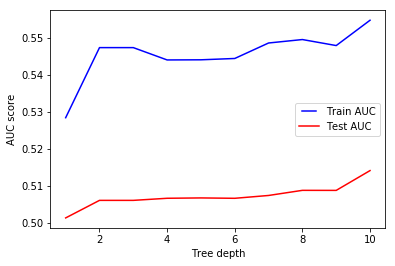

In [264]:
line1, = plt.plot(max_depths, train_results1, 'b', label='Train AUC')
line2, = plt.plot(max_depths, test_results1, 'r', label='Test AUC')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

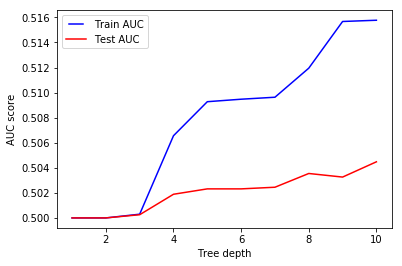

In [265]:
line1, = plt.plot(max_depths, train_results2, 'b', label='Train AUC')
line2, = plt.plot(max_depths, test_results2, 'r', label='Test AUC')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

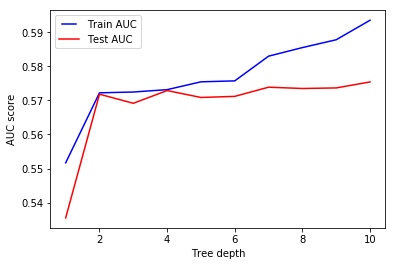

In [266]:
line1, = plt.plot(max_depths, train_results3, 'b', label='Train AUC')
line2, = plt.plot(max_depths, test_results3, 'r', label='Test AUC')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

In [294]:
min_samples_splits = np.linspace(0.1, 1, 10, endpoint=True)

train_results1 = []
train_results2 = []
train_results3 = []

test_results1 = []
test_results2 = []
test_results3 = []

for min_samples_split in min_samples_splits:
    dt = DecisionTreeClassifier(min_samples_split=min_samples_split, criterion='entropy')
    dt.fit(features_train, target_train)
    
    train_pred = dt.predict(features_train)
    
    y_pred = label_binarize(train_pred, classes=['lulus','hati hati','tidak lulus'])
    y_train = label_binarize(target_train, classes=['lulus','hati hati','tidak lulus'])
    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(3):
        fpr[i], tpr[i], _ = roc_curve(y_train[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        
    # Add auc score to previous train results
    train_results1.append(roc_auc[0])
    train_results2.append(roc_auc[1])
    train_results3.append(roc_auc[2])
    
    y_pred = dt.predict(features_test)
    
    y_pred = label_binarize(y_pred, classes=['lulus','hati hati','tidak lulus'])
    y_test = label_binarize(target_test, classes=['lulus','hati hati','tidak lulus'])
    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(3):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        
    test_results1.append(roc_auc[0])
    test_results2.append(roc_auc[1])
    test_results3.append(roc_auc[2])

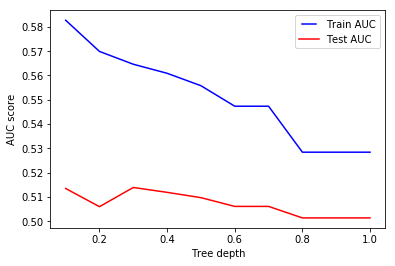

In [295]:
line1, = plt.plot(min_samples_splits, train_results1, 'b', label='Train AUC')
line2, = plt.plot(min_samples_splits, test_results1, 'r', label='Test AUC')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

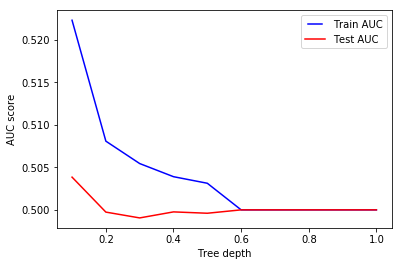

In [296]:
line1, = plt.plot(min_samples_splits, train_results2, 'b', label='Train AUC')
line2, = plt.plot(min_samples_splits, test_results2, 'r', label='Test AUC')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

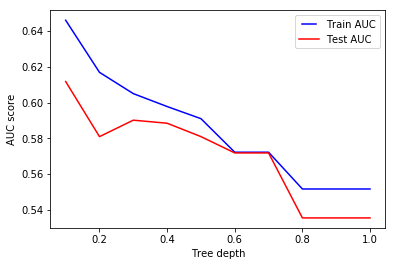

In [297]:
line1, = plt.plot(min_samples_splits, train_results3, 'b', label='Train AUC')
line2, = plt.plot(min_samples_splits, test_results3, 'r', label='Test AUC')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

In [331]:
min_samples_leaves = np.linspace(0.1, 0.5, 5, endpoint=True)

train_results1 = []
train_results2 = []
train_results3 = []

test_results1 = []
test_results2 = []
test_results3 = []

for min_samples_leaf in min_samples_leaves:
    dt = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf, criterion='entropy')
    dt.fit(features_train, target_train)
    
    train_pred = dt.predict(features_train)
    
    y_pred = label_binarize(train_pred, classes=['lulus','hati hati','tidak lulus'])
    y_train = label_binarize(target_train, classes=['lulus','hati hati','tidak lulus'])
    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(3):
        fpr[i], tpr[i], _ = roc_curve(y_train[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        
    # Add auc score to previous train results
    train_results1.append(roc_auc[0])
    train_results2.append(roc_auc[1])
    train_results3.append(roc_auc[2])
    
    y_pred = dt.predict(features_test)
    
    y_pred = label_binarize(y_pred, classes=['lulus','hati hati','tidak lulus'])
    y_test = label_binarize(target_test, classes=['lulus','hati hati','tidak lulus'])
    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(3):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        
    test_results1.append(roc_auc[0])
    test_results2.append(roc_auc[1])
    test_results3.append(roc_auc[2])

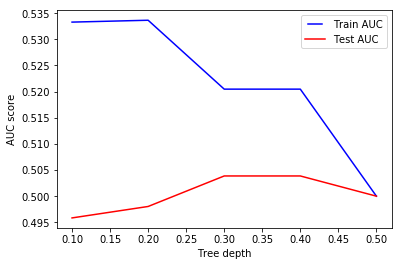

In [299]:
line1, = plt.plot(min_samples_leaves, train_results1, 'b', label='Train AUC')
line2, = plt.plot(min_samples_leaves, test_results1, 'r', label='Test AUC')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

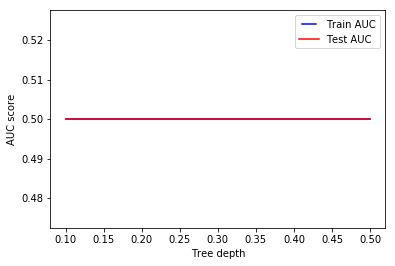

In [300]:
line1, = plt.plot(min_samples_leaves, train_results2, 'b', label='Train AUC')
line2, = plt.plot(min_samples_leaves, test_results2, 'r', label='Test AUC')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

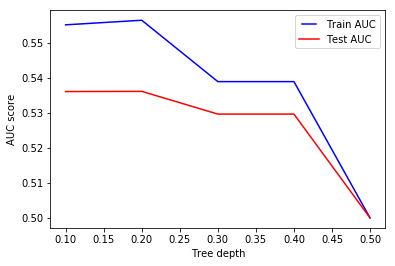

In [301]:
line1, = plt.plot(min_samples_leaves, train_results3, 'b', label='Train AUC')
line2, = plt.plot(min_samples_leaves, test_results3, 'r', label='Test AUC')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

In [352]:
max_features = list(range(1,features.shape[1]))

train_results1 = []
train_results2 = []
train_results3 = []

test_results1 = []
test_results2 = []
test_results3 = []

for max_feature in max_features:
    dt = DecisionTreeClassifier(max_features=max_feature, criterion='entropy')
    dt.fit(features_train, target_train)
    
    train_pred = dt.predict(features_train)
    
    y_pred = label_binarize(train_pred, classes=['lulus','hati hati','tidak lulus'])
    y_train = label_binarize(target_train, classes=['lulus','hati hati','tidak lulus'])
    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(3):
        fpr[i], tpr[i], _ = roc_curve(y_train[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        
    # Add auc score to previous train results
    train_results1.append(roc_auc[0])
    train_results2.append(roc_auc[1])
    train_results3.append(roc_auc[2])
    
    y_pred = dt.predict(features_test)
    
    y_pred = label_binarize(y_pred, classes=['lulus','hati hati','tidak lulus'])
    y_test = label_binarize(target_test, classes=['lulus','hati hati','tidak lulus'])
    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(3):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        
    test_results1.append(roc_auc[0])
    test_results2.append(roc_auc[1])
    test_results3.append(roc_auc[2])

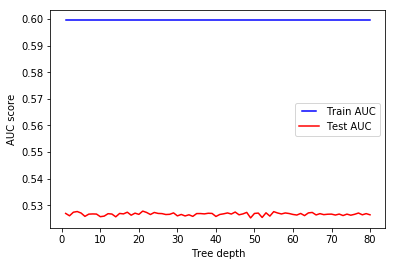

In [353]:
line1, = plt.plot(max_features, train_results1, 'b', label='Train AUC')
line2, = plt.plot(max_features, test_results1, 'r', label='Test AUC')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

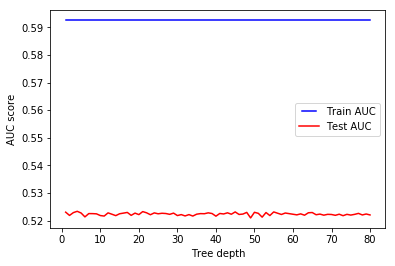

In [354]:
line1, = plt.plot(max_features, train_results2, 'b', label='Train AUC')
line2, = plt.plot(max_features, test_results2, 'r', label='Test AUC')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

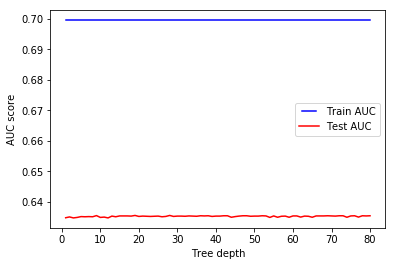

In [355]:
line1, = plt.plot(max_features, train_results3, 'b', label='Train AUC')
line2, = plt.plot(max_features, test_results3, 'r', label='Test AUC')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

# Bootsrapping

In [90]:
from sklearn.model_selection import ShuffleSplit
from sklearn import linear_model

In [241]:
features = features.reset_index(drop=True)
target = target.reset_index(drop=True)

In [246]:
clf = linear_model.SGDClassifier()
#features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.3, random_state=10)

#sm = SMOTE(random_state=20)
#features_train, target_train = sm.fit_sample(features_train.reshape(-1, 1), target_train)

#y_pred = clf.predict(features_test.reshape(-1, 1))

rs = ShuffleSplit(n_splits=100, test_size=.3, random_state=0)
test = []
for train_idx, test_idx in rs.split(features, target):
    sm = SMOTE(random_state=20)
    features_train, target_train = sm.fit_sample(features[train_idx].reshape(-1, 1), target[train_idx])
    
    clf = clf.partial_fit(features_train.reshape(-1, 1), target_train, classes=np.unique(target))
    
    test = test_idx

/home/dispsiau-2013/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  del sys.path[0]
/home/dispsiau-2013/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/dispsiau-2013/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  del sys.path[0]
/home/dispsiau-2013/anaconda3/lib/python3.6/site-packages/sklea

/home/dispsiau-2013/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/dispsiau-2013/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  del sys.path[0]
/home/dispsiau-2013/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to

/home/dispsiau-2013/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/dispsiau-2013/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  del sys.path[0]
/home/dispsiau-2013/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to

/home/dispsiau-2013/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/dispsiau-2013/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  del sys.path[0]
/home/dispsiau-2013/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to

/home/dispsiau-2013/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/dispsiau-2013/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  del sys.path[0]
/home/dispsiau-2013/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to

/home/dispsiau-2013/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/dispsiau-2013/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  del sys.path[0]
/home/dispsiau-2013/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to

/home/dispsiau-2013/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/dispsiau-2013/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  del sys.path[0]
/home/dispsiau-2013/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to

In [247]:
y_pred = clf.predict(features[test].reshape(-1, 1))
print(accuracy_score(target[test], y_pred, normalize=True))
print(confusion_matrix(target_test, y_pred))

0.14957264957264957
[[ 59   0 125]
 [104   0 171]
 [  5   0   4]]


/home/dispsiau-2013/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


# Random Forest

In [125]:
from sklearn.ensemble import RandomForestClassifier

In [126]:
clf = RandomForestClassifier(max_depth=10, random_state=100)
clf = clf.fit(features_train, target_train)
y_pred = clf.predict(features_test)

In [127]:
accuracy_score(target_test, y_pred, normalize=True)

0.3763303533418476

In [128]:
cm = confusion_matrix(target_test, y_pred)
cm

array([[ 845, 1721, 1250],
       [1106, 2602, 1705],
       [  21,   57,   89]])

# Logistic Regression

In [95]:
from sklearn.linear_model import LogisticRegression

In [27]:
logisticRegr = LogisticRegression()
logisticRegr.fit(features_train, target_train)
y_pred = clf.predict(features_test)

NameError: name 'LogisticRegression' is not defined

In [580]:
accuracy_score(target_test, y_pred, normalize=True)

0.3034269902085994

In [581]:
cm = confusion_matrix(target_test, y_pred)
cm

array([[1113,  947, 1756],
       [1340, 1613, 2460],
       [  19,   23,  125]])

# Multiclass Classifier

In [151]:
from sklearn.multiclass import OneVsRestClassifier

In [78]:
y_train = label_binarize(target_train, classes=['lulus','hati hati','tidak lulus'])
y_test = label_binarize(target_test, classes=['lulus','hati hati','tidak lulus'])
n_classes = 3

clf = OneVsRestClassifier(LinearSVC(random_state=0))
clf = clf.fit(features_train, y_train)
y_score = clf.decision_function(features_test)

# Evaluation

In [582]:
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

# Overall recall
RECALL = TP / (TP+FN)

# Overall precision
PRECISION = TP / (TP+FP)

In [583]:
ACC

array([0.56768838, 0.49233716, 0.54682844])

In [584]:
RECALL

array([0.29166667, 0.29798633, 0.74850299])

In [585]:
PRECISION

array([0.45024272, 0.62446767, 0.02879521])

# Saved Model

In [478]:
import pickle

In [577]:
pickle.dump(best, open( "savefile/final.sav", "wb" ))

In [505]:
clf.decision_path(features_test)

<9396x29 sparse matrix of type '<class 'numpy.int64'>'
	with 46973 stored elements in Compressed Sparse Row format>

# XGBoosting

In [210]:
cv_params = {'max_depth': [3,5,7], 'min_child_weight': [1,3,5]}
ind_params = {'learning_rate': 0.1, 'n_estimators': 1000, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             'objective': 'reg:logistic'}
optimized_GBM = GridSearchCV(xgb.XGBClassifier(**ind_params), 
                            cv_params, 
                             scoring = 'accuracy', cv = 5, n_jobs = -1) 

In [211]:
optimized_GBM.fit(features_train, target_train)

/home/dispsiau-2013/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/dispsiau-2013/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/dispsiau-2013/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/dispsiau-2013/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth 

/home/dispsiau-2013/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/dispsiau-2013/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/dispsiau-2013/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/dispsiau-2013/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth 

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='reg:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0, silent=True,
       subsample=0.8),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [212]:
optimized_GBM.grid_scores_

[mean: 0.49815, std: 0.00603, params: {'max_depth': 3, 'min_child_weight': 1},
 mean: 0.49815, std: 0.00659, params: {'max_depth': 3, 'min_child_weight': 3},
 mean: 0.49736, std: 0.00616, params: {'max_depth': 3, 'min_child_weight': 5},
 mean: 0.49960, std: 0.00444, params: {'max_depth': 5, 'min_child_weight': 1},
 mean: 0.49921, std: 0.00511, params: {'max_depth': 5, 'min_child_weight': 3},
 mean: 0.49900, std: 0.00451, params: {'max_depth': 5, 'min_child_weight': 5},
 mean: 0.50008, std: 0.00409, params: {'max_depth': 7, 'min_child_weight': 1},
 mean: 0.49982, std: 0.00442, params: {'max_depth': 7, 'min_child_weight': 3},
 mean: 0.49963, std: 0.00435, params: {'max_depth': 7, 'min_child_weight': 5}]

In [150]:
cv_params = {'learning_rate': [0.1, 0.01], 'subsample': [0.7,0.8,0.9]}
ind_params = {'n_estimators': 1000, 'seed':0, 'colsample_bytree': 0.8, 
             'objective': 'reg:logistic', 'max_depth': 7, 'min_child_weight': 1}


optimized_GBM = GridSearchCV(xgb.XGBClassifier(**ind_params), 
                            cv_params, 
                             scoring = 'accuracy', cv = 5, n_jobs = -1)
optimized_GBM.fit(features_train, target_train)


/home/dispsiau-2013/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/dispsiau-2013/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/dispsiau-2013/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/dispsiau-2013/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth 

/home/dispsiau-2013/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=7, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='reg:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0, silent=True,
       subsample=1),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'learning_rate': [0.1, 0.01], 'subsample': [0.7, 0.8, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [151]:
optimized_GBM.grid_scores_

[mean: 0.49982, std: 0.00471, params: {'learning_rate': 0.1, 'subsample': 0.7},
 mean: 0.50008, std: 0.00409, params: {'learning_rate': 0.1, 'subsample': 0.8},
 mean: 0.49947, std: 0.00461, params: {'learning_rate': 0.1, 'subsample': 0.9},
 mean: 0.49564, std: 0.00562, params: {'learning_rate': 0.01, 'subsample': 0.7},
 mean: 0.49699, std: 0.00608, params: {'learning_rate': 0.01, 'subsample': 0.8},
 mean: 0.49641, std: 0.00634, params: {'learning_rate': 0.01, 'subsample': 0.9}]

In [13]:
xgdmat = xgb.DMatrix(features_train, target_train)

ValueError: could not convert string to float: 'tidak lulus'

In [178]:
our_params = {'eta': 0.1, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             'objective': 'reg:logistic', 'max_depth':7, 'min_child_weight':1} 
# Grid Search CV optimized settings

cv_xgb = xgb.cv(params = our_params, dtrain = xgdmat, num_boost_round = 3000, nfold = 5,
                metrics = ['error'], # Make sure you enter metrics inside a list or you may encounter issues!
                early_stopping_rounds = 100) # Look for early stopping that minimizes error


XGBoostError: b'[23:38:44] src/objective/regression_obj.cc:103: Check failed: Loss::CheckLabel(y) label must be in [0,1] for logistic regression\n\nStack trace returned 10 entries:\n[bt] (0) /home/dispsiau-2013/anaconda3/lib/python3.6/site-packages/xgboost/./lib/libxgboost.so(_ZN4dmlc15LogMessageFatalD1Ev+0x3c) [0x7f69fb2cda6c]\n[bt] (1) /home/dispsiau-2013/anaconda3/lib/python3.6/site-packages/xgboost/./lib/libxgboost.so(_ZN7xgboost3obj10RegLossObjINS0_18LogisticRegressionEE11GetGradientEPNS_16HostDeviceVectorIfEERKNS_8MetaInfoEiPNS4_INS_6detail18bst_gpair_internalIfEEEE+0x2f2) [0x7f69fb37caa2]\n[bt] (2) /home/dispsiau-2013/anaconda3/lib/python3.6/site-packages/xgboost/./lib/libxgboost.so(_ZN7xgboost11LearnerImpl13UpdateOneIterEiPNS_7DMatrixE+0x311) [0x7f69fb2d9bb1]\n[bt] (3) /home/dispsiau-2013/anaconda3/lib/python3.6/site-packages/xgboost/./lib/libxgboost.so(XGBoosterUpdateOneIter+0x27) [0x7f69fb48ec37]\n[bt] (4) /home/dispsiau-2013/anaconda3/lib/python3.6/lib-dynload/../../libffi.so.6(ffi_call_unix64+0x4c) [0x7f6a42a13ec0]\n[bt] (5) /home/dispsiau-2013/anaconda3/lib/python3.6/lib-dynload/../../libffi.so.6(ffi_call+0x22d) [0x7f6a42a1387d]\n[bt] (6) /home/dispsiau-2013/anaconda3/lib/python3.6/lib-dynload/_ctypes.cpython-36m-x86_64-linux-gnu.so(_ctypes_callproc+0x2ce) [0x7f6a42c28dee]\n[bt] (7) /home/dispsiau-2013/anaconda3/lib/python3.6/lib-dynload/_ctypes.cpython-36m-x86_64-linux-gnu.so(+0x12825) [0x7f6a42c29825]\n[bt] (8) /home/dispsiau-2013/anaconda3/bin/python(_PyObject_FastCallDict+0x8b) [0x55bf113421bb]\n[bt] (9) /home/dispsiau-2013/anaconda3/bin/python(+0x19cd3e) [0x55bf113cfd3e]\n'

In [12]:
our_params = {'eta': 0.1, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic', 'max_depth':7, 'min_child_weight':1} 

final_gb = xgb.train(our_params, xgdmat, num_boost_round = 432)

NameError: name 'xgdmat' is not defined

# AdaBoost

In [512]:
from sklearn.ensemble import AdaBoostClassifier

In [626]:
#clf = DecisionTreeClassifier(max_features=81, max_depth=5, criterion='entropy', min_samples_split=7, min_samples_leaf=1)
abc = AdaBoostClassifier(best_model,n_estimators=1000,learning_rate=0.001, random_state=10)
clf = abc.fit(features_train, target_train)

In [622]:
y_pred = clf.predict(features_test)

In [627]:
y_score = clf.score(features_test, target_test)
y_score

0.3497232865048957

In [628]:
cm = confusion_matrix(target_test, y_pred)
cm

array([[1167, 1407, 1242],
       [1493, 2175, 1745],
       [  39,   37,   91]])

In [591]:
param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators": [1, 2]
             }
grid_search_ABC = GridSearchCV(abc, param_grid=param_grid, scoring = 'roc_auc')

In [592]:
grid_search_ABC

GridSearchCV(cv=None, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=7,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.5, n_estimators=600, random_state=10),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'base_estimator__criterion': ['gini', 'entropy'], 'base_estimator__splitter': ['best', 'random'], 'n_estimators': [1, 2]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)